In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from matplotlib import rcParams


rcParams['font.family'] = 'monospace'
rcParams['font.sans-serif'] = ['lucida console']


%matplotlib inline

# Print Versions
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.4 (v3.6.4:d48ecebad5, Dec 18 2017, 21:07:28) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
Pandas version 0.22.0
Matplotlib version 2.2.2


In [2]:
if not os.path.exists('./data'):
    os.makedirs('./data')

In [5]:
with open('./data/dlc.csv', 'w') as csvfile:
    csvwriter = csv.writer( csvfile)

    html = urlopen('http://store.steampowered.com/app/221680/')
    bsObj = BeautifulSoup(html, 'html.parser')

    nameList = bsObj.findAll('div', {'class':'game_area_dlc_name'})
    priceList = bsObj.findAll('div', {'class':'game_area_dlc_price'})
    

    for name, price in zip(list(nameList), list(priceList)):
       csvwriter.writerow([(name.get_text()).strip(), (price.get_text()).strip()])
pass

In [7]:
df = pd.read_csv('./data/dlc.csv', header=None)

In [8]:
df.shape

(1155, 2)

In [9]:
pack = df[0].str.contains('Song Pack')

In [10]:
df[pack].to_csv('./data/pack.csv', encoding='utf-8')

In [11]:
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)

In [12]:
df.columns = ['Song / Song Pack', 'Price']

In [13]:
df.head(10)

,Song / Song Pack,Price
0,Rocksmith® 2014 – Jet - “Are You Gonna Be My G...,2.99
1,Rocksmith® 2014 – Def Leppard - “Rock of Ages”,2.99
2,Rocksmith® 2014 – Fleetwood Mac - “Go Your Own...,2.99
3,Rocksmith® 2014 – Kansas - “Dust In the Wind”,2.99
4,Rocksmith® 2014 – Hit Singles Song Pack,9.99
5,Rocksmith® 2014 – The Cure - “Friday I’m In Love”,2.99
6,Rocksmith® 2014 – Slayer - “Raining Blood”,2.99
7,Rocksmith® 2014 – Slayer - “Angel of Death”,2.99
8,Rocksmith® 2014 – Slayer - “Seasons in the Abyss”,2.99
9,Rocksmith® 2014 – Slayer - “South of Heaven”,2.99


In [14]:
total = df['Price'].sum()
total = float("{0:.2f}".format(total))
print (total)

5098.45


In [15]:
df2 = pd.read_csv("./data/pack.csv", header=None)

In [16]:
df2[df2.columns[2:]] = df2[df2.columns[2:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.float64)

In [17]:
df2.shape

(230, 3)

In [18]:
df2.columns = ['List #', 'Song Pack', 'Price']

In [19]:
df2.head(10)

,List #,Song Pack,Price
0,NaN,0,1.00
1,4.0,Rocksmith® 2014 – Hit Singles Song Pack,9.99
2,11.0,Rocksmith® 2014 – Slayer Song Pack,11.99
3,15.0,Rocksmith® 2014 – All That Remains Song Pack,7.99
4,21.0,Rocksmith® 2014 – Blues Song Pack,11.99
5,25.0,Rocksmith® 2014 – Dethklok Song Pack,7.99
6,31.0,Rocksmith® 2014 – Alt-Rock Song Pack,11.99
7,35.0,Rocksmith® 2014 – Thin Lizzy Song Pack,7.99
8,40.0,Rocksmith® 2014 – Bush Song Pack,9.99
9,46.0,Rocksmith® 2014 – Spinal Tap Song Pack,11.99


In [20]:
df2 = df2[df2['Price'] != 1.00]
df2 = df2.drop('List #', 1)

In [21]:
df2.head(10)

,Song Pack,Price
1,Rocksmith® 2014 – Hit Singles Song Pack,9.99
2,Rocksmith® 2014 – Slayer Song Pack,11.99
3,Rocksmith® 2014 – All That Remains Song Pack,7.99
4,Rocksmith® 2014 – Blues Song Pack,11.99
5,Rocksmith® 2014 – Dethklok Song Pack,7.99
6,Rocksmith® 2014 – Alt-Rock Song Pack,11.99
7,Rocksmith® 2014 – Thin Lizzy Song Pack,7.99
8,Rocksmith® 2014 – Bush Song Pack,9.99
9,Rocksmith® 2014 – Spinal Tap Song Pack,11.99
10,Rocksmith® 2014 – Anthrax Song Pack,9.99


In [22]:
packs = df2['Price'].sum()
print('Packs:', packs)

Packs: 2319.71


In [23]:
songs = total - packs
print('Songs:', songs)

Songs: 2778.74


In [24]:
dict = {'Songs': [songs], 'Packs': [packs]}
df3 = pd.DataFrame(data = dict)
df3 = df3[['Songs', 'Packs']]
df3['Difference'] = df3['Songs'] - df3['Packs']
df3.head(1)

,Songs,Packs,Difference
0,2778.74,2319.71,459.03


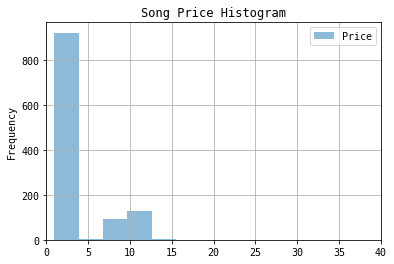

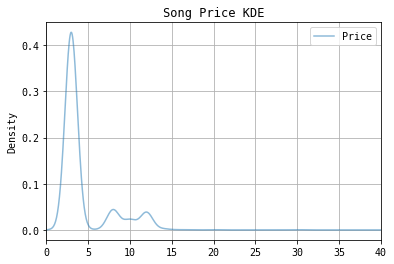

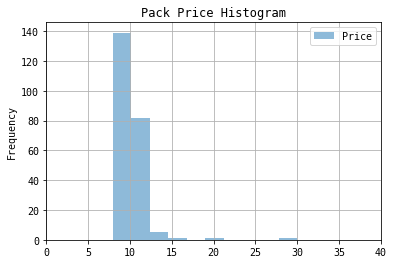

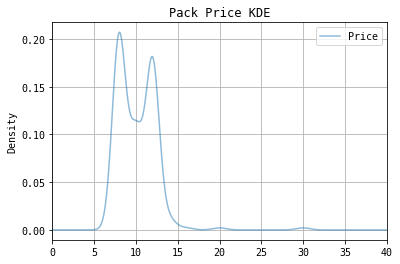

In [25]:
df['Price'] = df['Price'].astype(np.float64)

df.plot.hist(alpha=0.5, title = 'Song Price Histogram', grid = True, xlim = (0, 40))

df.plot.kde(alpha=0.5, title = 'Song Price KDE', grid = True, xlim = (0, 40))

df2.plot.hist(alpha=0.5, title = 'Pack Price Histogram', grid = True, xlim = (0, 40))

df2.plot.kde(alpha=0.5, title = 'Pack Price KDE', grid = True, xlim = (0, 40))